# TITANIC SURVIVOR PREDICTION MODEL

In [63]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [64]:
cd E://kaggle_projects_dataset

E:\kaggle_projects_dataset


In [65]:
#loading our training dataset
training_data = 'train.csv'
train = pd.read_csv(training_data)
testing_data = 'test.csv'
test = pd.read_csv(testing_data)

1. Exploratory Data Analysis is the first step to be performed in this process of developing a Machine Learning model

In [66]:
#describing the training data on different metrics
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train.head() #first five rows of training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Data Preparation or Data cleaning is the second step in this process where we prepare our data as per our considerations so that we can feed our data into our Machine Learning algorithm.

In [68]:
#checking whether these three columns have null values
train[['Age','Cabin','Embarked']].isnull().any()

Age         True
Cabin       True
Embarked    True
dtype: bool

In [69]:
#Calculating the total null values in different columns or attributes
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we know that 'Cabin' columns is having 687 null values out of total 891 values. So, we drop this column as such it is not relevant to include this column for building our model, as we cannot fill any random value into these rows.

In [70]:
# Filling the 'Age' and 'Embarked' columns with the higher frequency value 
#train['Age'] = train['Age'].fillna(train['Age'].value_counts().index[0])
#train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [71]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [73]:
train = train.drop(['Cabin'], axis=1)

In [74]:
train.head(n=30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


Now after checking the training dataset, we now go through our test dataset.

In [75]:
# Checking the null values in testing data
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

As we can see in above cell that in the columns 'Age','Fare' and 'Cabin' are having some null(NaN) values

In [76]:
#check for any other unusable values
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As you can see that most of the values in column 'Cabin' are null so we will drop it from the dataframe. Since, there is no point of filling such large amount of values by assumption, as it will have no relevance towards the survival prediction.

In [77]:
# Filling the null(NaN) values in the 'Age' column by the most frequent value in the column
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [78]:
test = test.drop(['Cabin'], axis=1)

In [79]:
test.head(n = 30)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,S


In [80]:
# dropping the ticket column from training and testing data
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [81]:
# dropping the Fare column from training and testing data
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

In [82]:
# mapping the gender of passengers with male as 0 and female as 1 in training and testing dataset
gender_mapping = {"male":0,"female":1}
train['Sex'] = train['Sex'].map(gender_mapping)
test['Sex'] = test['Sex'].map(gender_mapping)

In [83]:
train.head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,C


In [84]:
#mapping the values of 'Embarked' column
embarked_mapping = {"S":1,"C":2,"Q":3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

In [85]:
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [86]:
#creating a combined dataset
combine = [train, test]
#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [87]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [88]:
#Mapping the title column values into numerical values
title_mapping = {"Master":1, "Miss": 2, "Mr":3, "Mrs":4, "Rare":5, "Royal":6}
train['Title'] = train['Title'].map(title_mapping)

In [89]:
#Dropping the Name column from the training and testing dataset
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [90]:
#Dividing the Age of Passengers into different bands
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

In [91]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [92]:
#Mapping the Age column values into numerical values
age_mapping = {"Baby":1, "Child":2, "Teenager":3, "Student":4, "Young Adult":5, "Adult":6, "Senior":7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [93]:
title_mapping = {"Master":1, "Miss": 2, "Mr":3, "Mrs":4, "Rare":5, "Royal":6}
test['Title'] = test['Title'].map(title_mapping)

In [94]:
train.head(n=20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,1,0,3,0,22.000000,1,0,1,3,4
1,2,1,1,1,38.000000,1,0,2,4,6
2,3,1,3,1,26.000000,0,0,1,2,5
3,4,1,1,1,35.000000,1,0,1,4,5
4,5,0,3,0,35.000000,0,0,1,3,5
5,6,0,3,0,29.699118,0,0,3,3,5
6,7,0,1,0,54.000000,0,0,1,3,6
7,8,0,3,0,2.000000,3,1,1,1,1
8,9,1,3,1,27.000000,0,2,1,4,5
9,10,1,2,1,14.000000,1,0,2,4,3


In [95]:
#Finally dropping the Age column as we have formed a new AgeGroup column which is more classified 
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

In [96]:
train.head(n=20) #training dataset first 20 rows

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,1,3,4
1,2,1,1,1,1,0,2,4,6
2,3,1,3,1,0,0,1,2,5
3,4,1,1,1,1,0,1,4,5
4,5,0,3,0,0,0,1,3,5
5,6,0,3,0,0,0,3,3,5
6,7,0,1,0,0,0,1,3,6
7,8,0,3,0,3,1,1,1,1
8,9,1,3,1,0,2,1,4,5
9,10,1,2,1,1,0,2,4,3


In [97]:
test.head(n=20) #testing datset first 20 rows

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,0,0,0,3,3,5
1,893,3,1,1,0,1,4,6
2,894,2,0,0,0,3,3,7
3,895,3,0,0,0,1,3,5
4,896,3,1,1,1,1,4,4
5,897,3,0,0,0,1,3,3
6,898,3,1,0,0,3,2,5
7,899,2,0,1,1,1,3,5
8,900,3,1,0,0,2,4,3
9,901,3,0,2,0,1,3,4


3. Now we go through our Data Visualization task in which we visualize the results corresponding to the 'Survived' column(target label) based on different features of the dataset. 

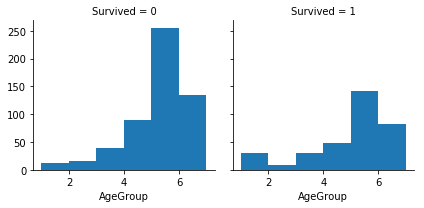

In [264]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'AgeGroup', bins=6)

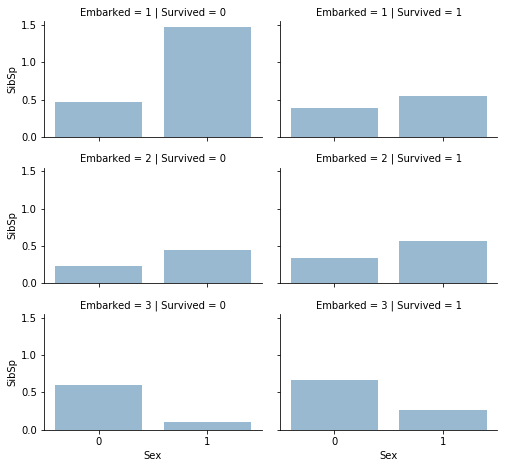

In [289]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','SibSp', alpha=.5, ci=None)
grid.add_legend()

4. Here we come into our fourth step in which we develop our machine learning model for predicting the Survived or not Survived people based on their features.

In [228]:
# Features used for training
x_train = train.drop(['Survived','PassengerId'], axis=1)
# Target Variable for training
y_train = train['Survived']
x_test  = test.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [283]:
#Now developing our model using KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

predict = neigh.fit(x_train, y_train).predict(x_test)
#predict = neigh.predict(test)

KNN_accuracy= round(neigh.score(x_train,y_train)*100, 2)

KNN_accuracy

82.38

In [284]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
pred = gnb.fit(x_train, y_train).predict(x_test)

#print the accuracy score of the model
Naive_Bayes_accuracy = round(gnb.score(x_train,y_train)*100, 2)

Naive_Bayes_accuracy

81.03

In [285]:
#import the necessary modules
from sklearn.svm import LinearSVC

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=1)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(x_train,y_train).predict(x_test)

#print the accuracy score of the model
LinearSVC_accuracy = round(svc_model.score(x_train,y_train)*100, 2)

LinearSVC_accuracy

80.47

In [286]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
pred = decision_tree.predict(x_test)
Decision_tree_accuracy = round(decision_tree.score(x_train, y_train) * 100, 2)

Decision_tree_accuracy

86.98

In [287]:
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [KNN_accuracy,Naive_Bayes_accuracy,LinearSVC_accuracy, Decision_tree_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,86.98
0,KNN,82.38
1,Naive Bayes,81.03
2,Linear SVC,80.47


In [288]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict
    })
print(submission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         0
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3

In [263]:
#submission.to_csv('.../submission.csv', index=False)